In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Electric.csv")

In [3]:
data['stabf'] = data['stabf'].astype('string')

In [4]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tau1                        10000 non-null  float64
 1   tau2                        10000 non-null  float64
 2   tau3                        10000 non-null  float64
 3   tau4                        10000 non-null  float64
 4   p1                          10000 non-null  float64
 5   p2                          10000 non-null  float64
 6   p3                          10000 non-null  float64
 7   p4                          10000 non-null  float64
 8   g1                          10000 non-null  float64
 9   g2                          10000 non-null  float64
 10  g3                          10000 non-null  float64
 11  g4                          10000 non-null  float64
 12  stab                        10000 non-null  float64
 13  stabf                       1000

In [6]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
df = data

In [8]:
df["total_power_consumed"] = abs(df["p2"] + df["p3"] + df["p4"])
df["producer_to_consumer_ratio"] = df["p1"] / df["total_power_consumed"]
df["avg_tau_consumers"] = (df["tau2"] + df["tau3"] + df["tau4"]) / 3
df["avg_g_consumers"] = (df["g2"] + df["g3"] + df["g4"]) / 3

In [9]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,total_power_consumed,producer_to_consumer_ratio,avg_tau_consumers,avg_g_consumers
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable,3.763085,1.0,7.080555,0.901686
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable,5.067812,1.0,3.106474,0.735438
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable,3.405158,1.0,4.369808,0.571995
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable,3.963791,1.0,4.832268,0.756281
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable,3.525811,1.0,7.470035,0.644440


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)

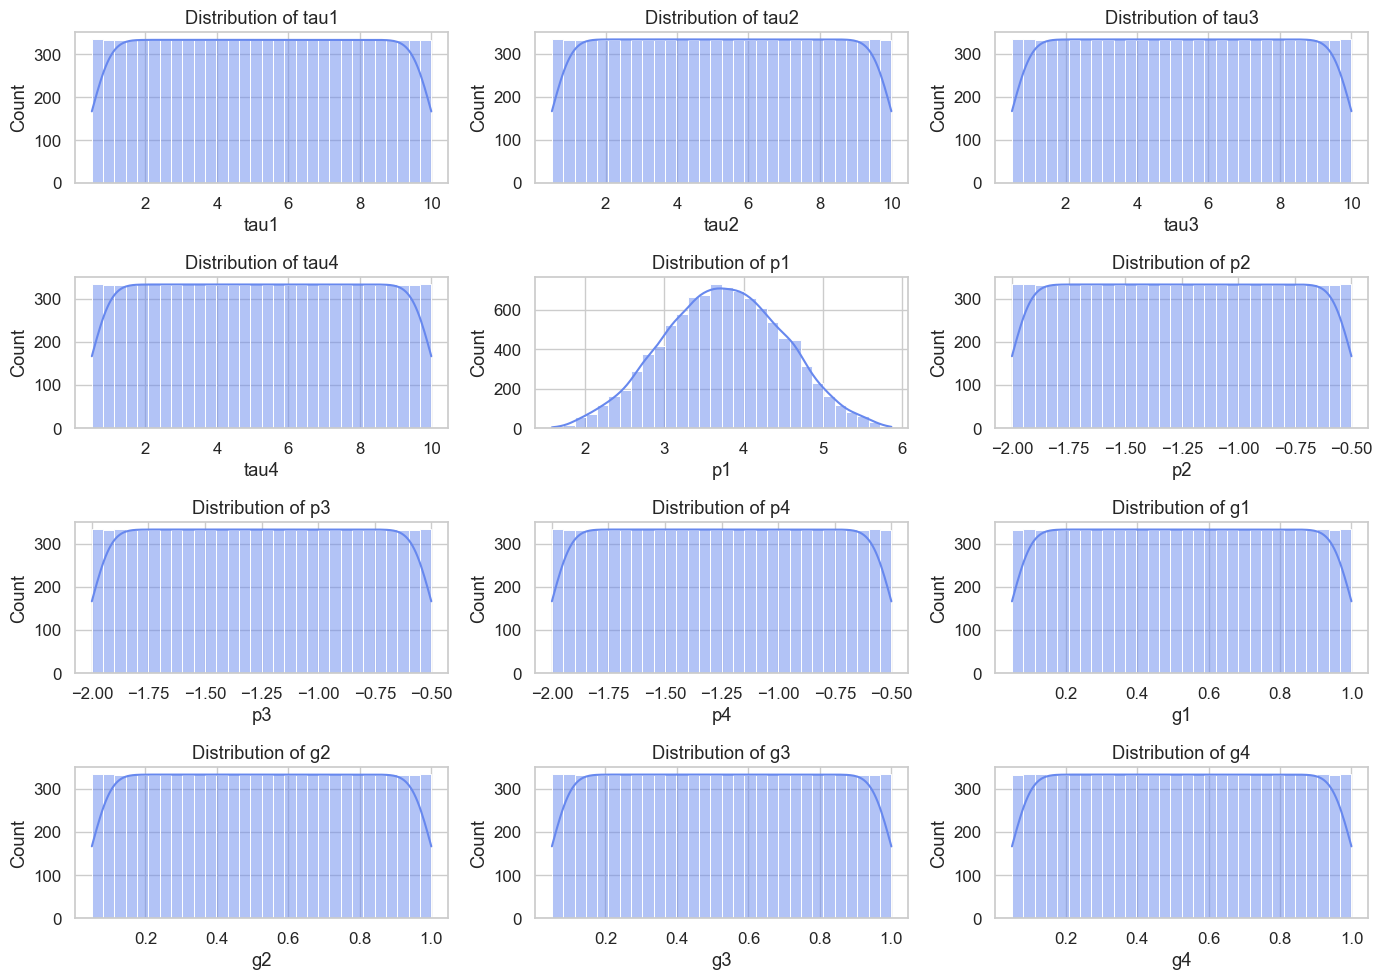

In [12]:
numeric_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols[:12], 1):  # exclude stab/stabf for now
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [13]:
# Are there clusters or skewness in tau or g?
# Any outliers in p values (power imbalance)?

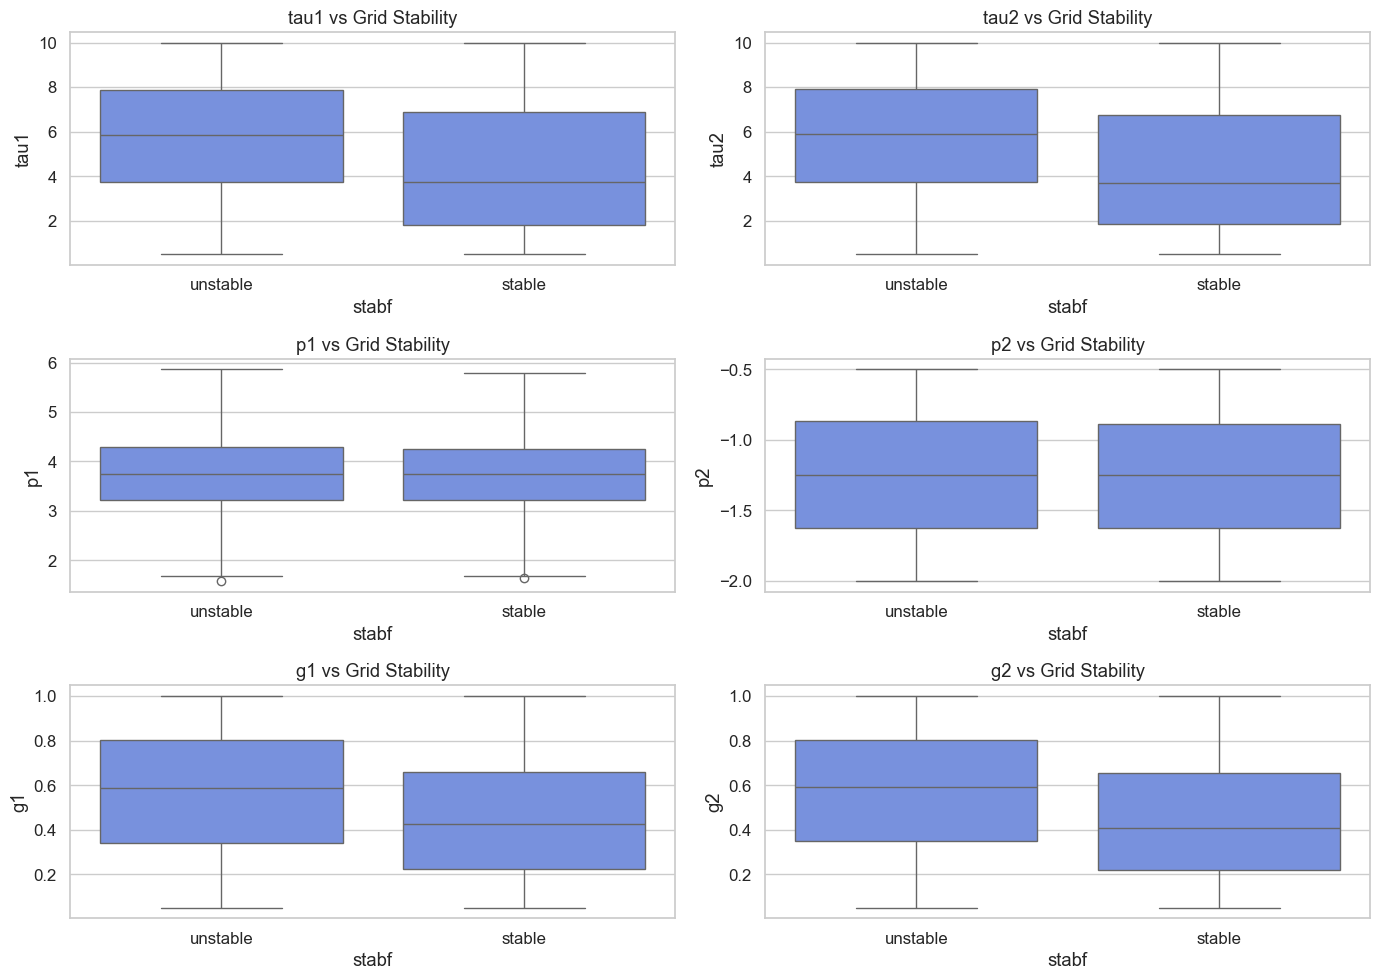

In [14]:
# Boxplots for key parameters
key_features = ['tau1', 'tau2', 'p1', 'p2', 'g1', 'g2']
plt.figure(figsize=(14, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='stabf', y=col, data=df)
    plt.title(f"{col} vs Grid Stability")
plt.tight_layout()
plt.show()

In [15]:
# Higher tau1 (slow producer reaction) → more instability
# Extreme p1 or p2 values → imbalance → instability
# Low g1 or high g2 (poor elasticity) → instability risk

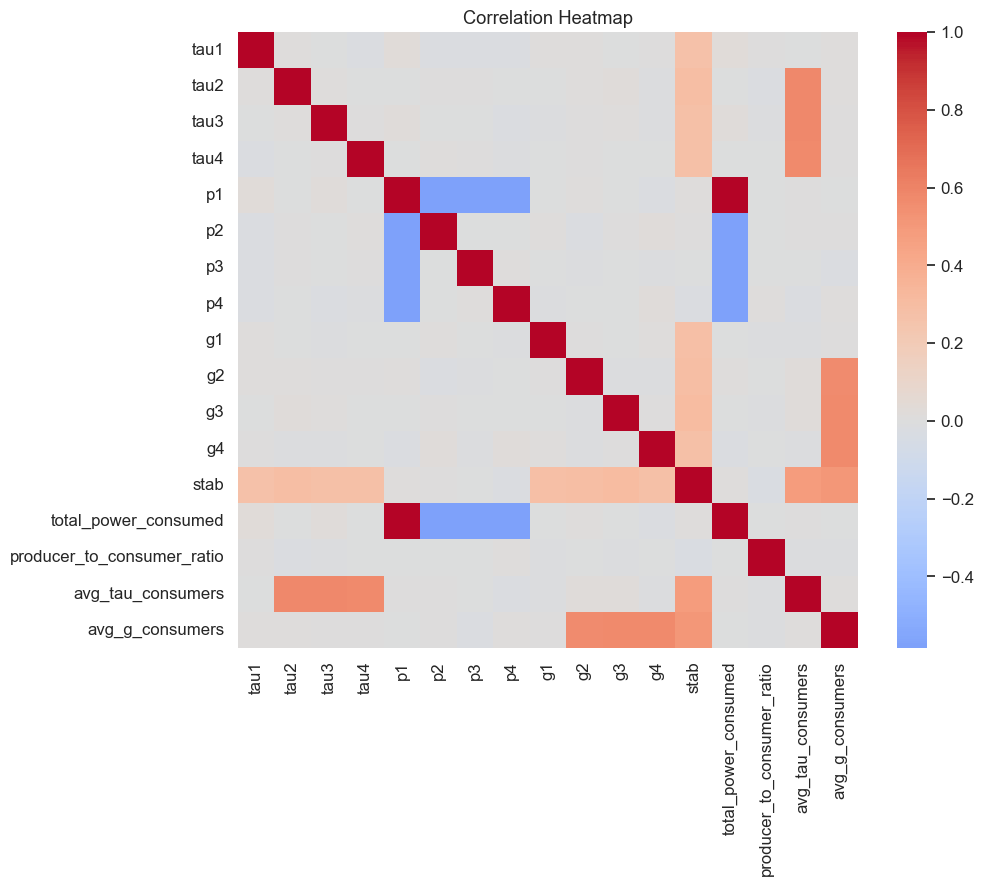

In [16]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
stab_corr = corr['stab'].sort_values(ascending=False)
display(stab_corr)

stab                          1.000000
avg_g_consumers               0.512242
avg_tau_consumers             0.488189
g3                            0.308235
g2                            0.293601
tau2                          0.290975
g1                            0.282774
tau3                          0.280700
g4                            0.279214
tau4                          0.278576
tau1                          0.275761
total_power_consumed          0.010278
p1                            0.010278
p2                            0.006255
p3                           -0.003321
p4                           -0.020786
producer_to_consumer_ratio   -0.026723
Name: stab, dtype: float64

In [18]:
# Strong correlations with stab show which features control stability.
# avg_g_consumers               0.512242
# avg_tau_consumers             0.488189

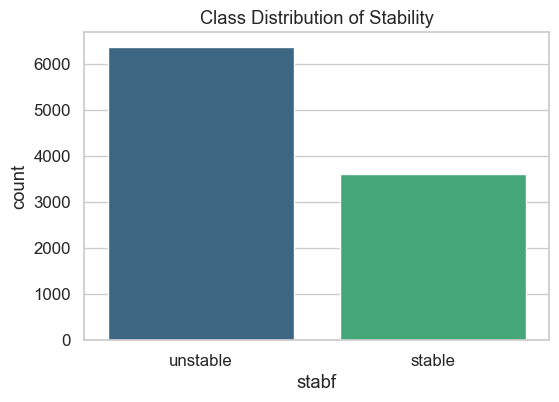

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stabf', data=df, palette="viridis", hue='stabf', legend=False)
plt.title("Class Distribution of Stability")
plt.show()

In [20]:
class_counts = df['stabf'].value_counts(normalize=True) * 100
print(class_counts)

unstable    63.8
stable      36.2
Name: stabf, dtype: Float64


In [21]:
X = df.drop(['stab', 'stabf'], axis=1)
y = df['stabf']

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # stable → 0, unstable → 1

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      stable       0.91      0.88      0.90       724
    unstable       0.94      0.95      0.94      1276

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 640   84]
 [  65 1211]]


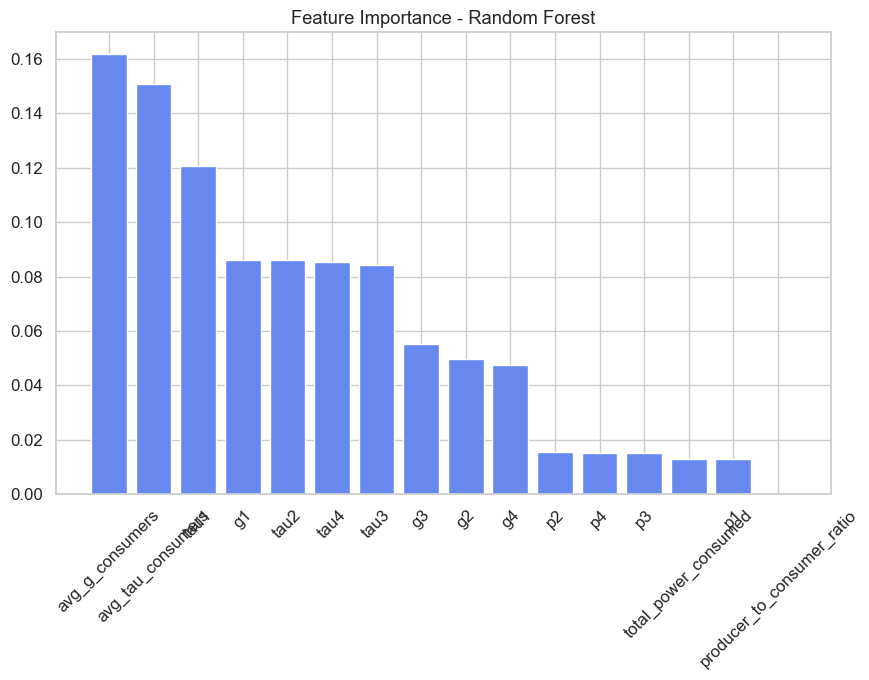

In [26]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importance - Random Forest")
plt.show()

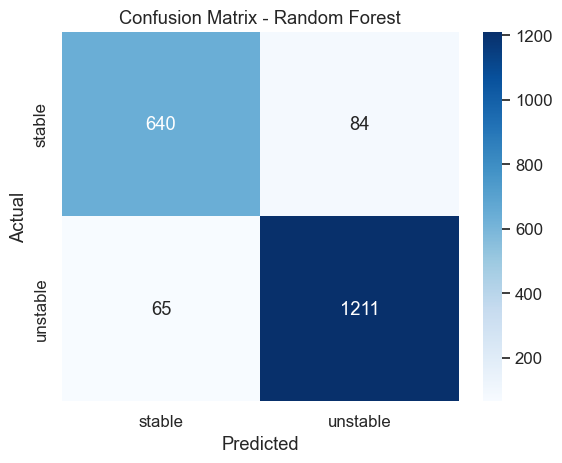

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

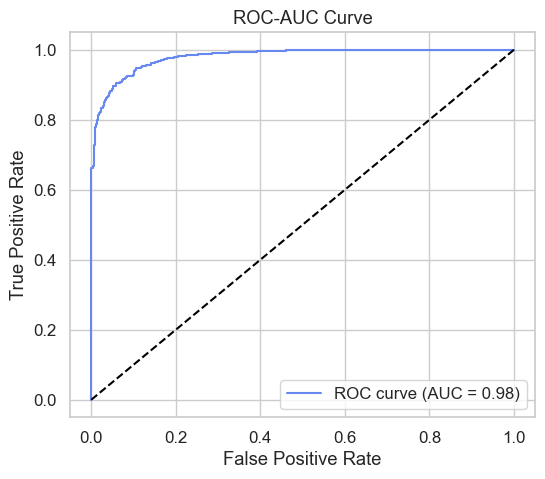

In [28]:
from sklearn.metrics import roc_curve, auc

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [29]:
import joblib

joblib.dump(rf, 'grid_stability_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']